# Simple Example of Data Analysis - Linear Projection

See, e.g. 

- https://en.wikipedia.org/wiki/Linear_least_squares
- https://en.wikipedia.org/wiki/Ordinary_least_squares
- https://en.wikipedia.org/wiki/Data_analysis
- https://en.wikipedia.org/wiki/Projection_(linear_algebra)

In [22]:
import numpy as np
import numpy.linalg as al
from matplotlib import pyplot as plt
from platform import python_version

!jupyter --version
(python_version(), np.__version__)



Selected Jupyter core packages...
IPython          : 8.11.0
ipykernel        : 6.21.3
ipywidgets       : 8.0.4
jupyter_client   : 8.0.3
jupyter_core     : 5.2.0
jupyter_server   : 2.4.0
jupyterlab       : 3.6.1
nbclient         : 0.7.2
nbconvert        : 7.2.9
nbformat         : 5.7.3
notebook         : 6.5.3
qtconsole        : 5.4.0
traitlets        : 5.9.0


('3.10.6', '1.24.2')

## Linear Algebra with real estate as an example
This is just a "thought experiment" - all the data is randomly generated.

Let's say that a house price is determined by just 3 *factors* (features):

1. Distance $D$ in miles from the City center, for example 20
2. House condition, $C$, for example 50 (on a scale from 0 to 100)
3. Number of rooms, $R$, for example 3

We want to find a *function* (rule) that estimates a house price $P$ based on just these three factors.
The simplest case would be a *linear function*:

\begin{align}
P = A + D * \text{"distance from the city"} + C * \text{"house condition"} + R *\text{"number of rooms"}  \label{estimate}\tag{0}
\end{align}

where the meaning of fixed numbers $A, D,C,R$ is as follows:
- $A$ is a constant, measuring something that affects all houses in the same way (e.g. market trend)
- $D$ is a location *effect* on price
- $C$ is a house condition effect on price
- $R$ is a number of rooms effect on proce

We have just described a notion of *linear model*, cf, https://en.wikipedia.org/wiki/Linear_model

Last year house sales database might contain a *table*


| distance | condition | number of rooms | price |
|:---------|:---------:|----------------:|:------|
| 20       |     5     |               3 |200|
| 10       |     8     |               4 |500|
|..........|...........|.................|...|

Can we use this table to determine the numbers $A, D,C,R$?
Here is where *Linear Algebra* comes in. Suppose we have this data for $100$ houses.
Hence, there are three $n$-dimensional (column) *vectors* of length (dimension) n = 100
for each of the features and there is the fourth $n$-dimensional vector of  house prices.

Plausible data for all four feature vectors is randomly generated. 
This data can be (re)generated any number of times - to view a summary see <a href='#histograms'>histograms</a>  after data generation step below.  

It is important to note at this point that our real estate data for 100 houses
is *represented* by four factor (feature) vectors in 100-dimensional *vector space*.




In [23]:
mean = 500
std = 100
n_houses = 100
n = n_houses


In [24]:
def number_of_rooms( price ) :

    if price < mean - 2 * std :
         return np.random.randint( 1,2 )

    if price < mean - 1 :
         return np.random.randint( 2,3 )

    if price > mean + 2 * std :
         return np.random.randint( 5,6)

    if price > mean + 1 * std :
         return np.random.randint( 4,5 )

    return np.random.randint( 3,4 )
    
n_rooms = np.vectorize( number_of_rooms ) 


def house_condition( price ) :
    if price < mean - 2 * std :
         return np.random.normal(loc=20, scale=2, size=1 )[0]

    if price < mean -1 :
         return np.random.normal(loc=30, scale=3, size=1 )[0]

    if price > mean + 2 * std :
         return np.random.normal(loc=80, scale=8, size=1 )[0]

    if price > mean + 1 * std :
         return np.random.normal(loc=60, scale=6, size=1 )[0]

    return np.random.normal(loc=50, scale=5, size=1 )[0]
  
h_condition =  np.vectorize( house_condition) 


def house_distance_from_the_city_center( price ) :
    if price < mean - 2 * std :
        return np.random.normal(loc=25, scale=2.5, size=1 )[0]
    
    if price < mean - 1 * std :
        return np.random.normal(loc=20, scale=2, size=1 )[0]
    
    if price > mean + 2 * std :
        return np.random.normal(loc=5, scale=.5, size=1 )[0]
    
    if price > mean + 1 * std :
        return np.random.normal(loc=10, scale=1, size=1 )[0]

    return np.random.normal(loc=15, scale=1.5, size=1 )[0]
  
h_distance = np.vectorize( house_distance_from_the_city_center )

### <a id="histograms">  Data *Histograms* </a>

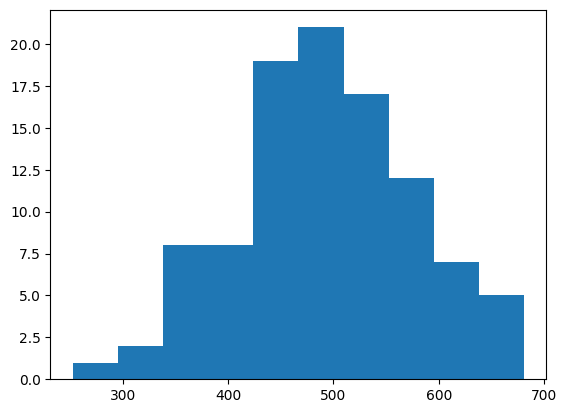

In [25]:
price_in_thousands = np.random.normal(loc=mean, scale=std, size=n )
distance = h_distance(price_in_thousands)
condition = h_condition( price_in_thousands  )
rooms = n_rooms( price_in_thousands )

#print( np.cov(np.ones(100), rooms ))

#  uncomment to see a histogram

plt.hist(price_in_thousands)
#plt.hist( rooms )
#plt.hist( condition )
#plt.hist( distance )
# function to show the plot
plt.show()


### [Linear Vector Space](https://en.wikipedia.org/wiki/Vector_space)

Let $ v_1, v_2, \cdots, v_k  $ be $k$ fixed ($n$-dimensional) vectors in our $n$-dimensional (e.g. $n = 100, k = 4 $) vector  space $V$.
For any real numbers  $  \alpha_1, \alpha_2, \cdots,  \alpha_k $ we have a *linear combination*

\begin{align}
v = \alpha_1 v_1 + \alpha_2 v_2 + \cdots + \alpha_k v_k \in L \subset V \label{eq1}\tag{1}
\end{align}

The formula (\ref{eq1}) represents a linear mixture of $k$ feature vectors.
The set $L$ of all such linear combinations is a $k$-dimensional ($k$-parameter) *subspace* of $V $.
Suppose now that we have some other vector $v_0 \in V $.
It might belong to $L$, i.e. it could happen
that $ v_0 = \beta_1 v_1 + \beta_2 v_2 + \cdots v_3 + \beta_k v_k$, for some real numbers $ \beta_1, \; \beta_2 , \; \cdots , \; \beta_k $
or it might not. In any case, we can try to solve the following problem
> Find an *orthogonal projection* $ w_0 \in L $ of the vector $v_0$ onto the vector space $L$
>
> In other words, find  $w_0 \in L $ such that the length  ($=$ Euclidean *norm*)
> of vector $ w_0 - v_0 $  is no greater than the length of  $ w - v_0 $ for any $ w \in L $
>
> In other words, we have an *optimization* problem (cf. https://en.wikipedia.org/wiki/Mathematical_optimization):

> find real numbers $ x_1,x_2, \cdots, x_k $ that minimize the norm

\begin{equation}
\parallel x_1 v_1 + x_2 v_2 + \cdots + x_k v_k - v_0  \parallel  \label{eq2}\tag{2}
\end{equation}
>
> **Interpretation**:  we are looking for  $4$ *coefficients*   that can be used   to  estimate a price of every house as a mixture ([0](#mjx-eqn-estimate))
> of house features in a "best way possible" (well, in some Linear Algebra sense)
>

To solve this problem, we introduce
(collect) an  $ n \times k $ *matrix* $ M $ in such a way that $k$ columns of $M$ are exactly our $k$
(feature) vectors $ v_1, v_2, \cdots, v_k$ (in that order).

Scanning the matrix $M$ row by row we see that:

- the first row of M is a $k$-dimensional vector ( the first coordinate ov $v_1$, the first coordinate ov $v_2, \cdots$ )
- the second row of M is formed by the second coordinate ov $v_1$, the second coordinate ov $v_2, \cdots $
- the third row of M is formed by the third coordinate ov $v_1$, the third coordinate ov $v_2, \cdots$

and so on. In case of original real estate problem ([0](#mjx-eqn-estimate)), it is useful to think that a row numeber $i$  of $M$ is
a $k$-dimensional vector of the features of the house number $i$.

In this notation we can rewrite our minimization problem ($\ref{eq2}$) as


\begin{align}
\text{find a vector } x = (x_1,x_2, \cdots, x_k)  \text{ that minimizes norm (distance) } objective \; function   \parallel Mx - v_0 \; \parallel  \label{eq3}\tag{3}
\end{align}

The expression  (\ref{eq3}) can be read as follows. We have $n \times k$ matrix $M$ times $k$-vector $x$. The result will be $n$-vector that is
a linear combination of the columns of $M$. Since $k$ coordinates of $x$ are unknown variables, $Mx$ essentially represents a generic vector in $L$
as in (\ref{eq1}). Hence, the objective function (\ref{eq3}) represents the *distance* of $v_0$ from a generic vector in $L$.

Denote the *dot product* (https://en.wikipedia.org/wiki/Dot_product) of vectors $a,b$ by $<a,b>$.
By definition,   $w$ is an orthogonal projection of $v_0$ onto $L$ if and only if  the vector $ w - v_0 $ is *perependicular* to $L$, that is
if and only if $ <w - v_0, y> \;=\; 0 \;$  for any $y \in L $.
Since $L$ is a *linear span* of the columns $v_i, i = 1,\; \cdots. \; k $ of the matrix $M$,
this requirement leads to a system of so-called *normal* equations

\begin{align}
    <Mx - v_0 ,\; v_i> \; = \;  0 \;  \text{that is} \; <Mx,\;v_i> \;= \; <v_0,v_i> , \;     i = 1,2,\cdots, k   \label{eq4}\tag{4}
\end{align}

Both sides of equatons (\ref{eq4})  are dot products with colums of $M$, in fact
\begin{align}
<Mx,v_i> = < x_1 v_1 + x_2 v_2 + \cdots +  x_k v_k, v_i > = \sum_{j}^k <v_i,v_j> x_j
\end{align}
where  the matrix $G$ with elemnts $ <v_i,v_j>, \; i,j = 1, \cdots , k $ is the *Gram matrix* of the vector set $ v_1, \cdots , v_k $ (cf. https://en.wikipedia.org/wiki/Gram_matrix) 

Using notation $ M^T $ for a $ k \times n $ *transpose* of $M$, note that $ G = M^TM$ and 
rewrite $k$ equations (\ref{eq4}) as one matrix equation,

\begin{align}
 M^TMx \;= \; M^Tv_0 \label{eq5}\tag{5}
\end{align}


If the $k \times k$ (Gram) matrix $M^TM$ is *invertible*, the equation (\ref{eq5}) has a unique solution

\begin{align}
 x_0 \; = \; (M^TM)^{-1}M^Tv_0 \; \text{ and therefore, the projection} \; Mx_0 \; \text{is equal to} \; M(M^TM)^{-1}M^Tv_0\;  \label{eq6}\tag{6}
\end{align}


**Remark 1.**
We have found the  *orthogonal projection operator* onto a linear span $L$ of columns of $M$. This *linear operator* is represented
  by the matrix $ M(M^TM)^{-1}M^T $

**Remark 2.**
The problem can be solved even when the matrix $M^TM$ is not invertible.
This, however, could be a main theme for another story (see e.g. https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse )

### Back to "reality"
We would like to find four numbers $ A, D, C, R $ such that the price
of the house number $i$ can be estimated (see ([0](#mjx-eqn-eq0)),([1](#mjx-eqn-eq1))) as a *linear combination*

\begin{align}
\text{ A + D * distance[i] + C * condition[i] + R * rooms[i] }      \label{eq7}\tag{7}
\end{align}

Recall that

- D is the linear effect of a house distance from the city center on the price
- C is the linear effect of a house condition on the price
- R is the linear effect of a number of rooms on the price

For example, if it turns out that $A = 100, D=-2, C=20, R = 200 $ then the price of the house number 10 will be estimated as

In [26]:
A=100; D=-2; C=20; R = 200
(round( distance[10],5),
 round( condition[10],5 ),
 round(rooms[10],5),
 round( A + D * distance[10] + C * condition[10] + R * rooms[10], 5),
 round( price_in_thousands[10], 5 ) )

(14.31993, 29.23659, 2, 1056.09202, 470.26964)

This estimation is way off. Moreover, we need these four coefficients to "work" for all houses. So, with this choice of ecoefficients, what is the estimate of the price of house number 91?

In [27]:
(round( distance[91],5),
 round( condition[91],5 ),
 round(rooms[91],5),
 round( A + D * distance[91] + C * condition[91] + R * rooms[91], 5),
 round( price_in_thousands[91], 5 ) )

(15.45947, 24.09654, 2, 951.01175, 443.8503)

Not good either

### Linear Regression
To find an optimal estimate ([7](#mjx-eqn-eq7)) compute the four-dimensional vector $(A, D,C,R)$ by formula ([6](#mjx-eqn-eq6)).

First, initialize the matrix $M$. Bear in mind, that the first column of $M$ is an $n$-dimensional vector with all its coordinates equal to $1$.

In [28]:
# assign column vectors
n_factors = 4
M = np.zeros( ( n, n_factors) )
M[:,0] = np.ones(n)     # v_1
M[:,1] = distance       # v_2
M[:,2] = condition      # v_3
M[:,3] = rooms          # v_4
H = price_in_thousands  # v_0


Invert the matrix $M^TM$ as prescribed by ([6](#mjx-eqn-eq6))

In [29]:
d = np.dot( np.transpose(M), M )
print( "determinant =", al.det(d) )
inv_M = al.inv( d )
#inv_M

determinant = 6824951860.179104


**Remark 3.** This is a huge number, and that is one of the reasons for the existence of better methods of finding ortogonal projections, see
for example, https://en.wikipedia.org/wiki/Singular_value_decomposition and a section on SVD below.

We are almost done. Compute $M^Tv_0$

In [30]:
B = np.dot( np.transpose(M), H )   # H == price_in_thousands

<a id="regresult">  According to ([6](#mjx-eqn-eq6)), the unique solution to our linear regression nproblem is </a>

In [31]:
x = np.dot( inv_M, B )

In [32]:
x   # == (A, D, C, R)

array([396.12751815,  -8.22714306,   1.83551716,  57.43468942])

These four numbers can be used to obtain a price-estimate for any house. Certainly, we can now estimate prices of all the houses on our original 100-long list (cf. [7](#mjx-eqn-eq7))

In [33]:
estimated_prices = np.dot( M,  x )


Let's compare these estimates with "actual" prices for the houses 10 and 91

In [34]:
(round( distance[10],5),
 round( condition[10],5 ),
 round(rooms[10],5),
 round( A + D * distance[10] + C * condition[10] + R * rooms[10], 5),
 round( price_in_thousands[10], 5 ),
 round( estimated_prices[10], 5 )  )

(14.31993, 29.23659, 2, 1056.09202, 470.26964, 446.84902)

In [35]:
(round( distance[91],5),
 round( condition[91],5 ),
 round(rooms[91],5),
 round( A + D * distance[91] + C * condition[91] + R * rooms[91], 5),
 round( price_in_thousands[91], 5 ),
 round( estimated_prices[91], 5 )  )

(15.45947, 24.09654, 2, 951.01175, 443.8503, 428.0392)

This is much better estimate than the original random choice of coefficients.
To have a feel for how far away is the linear projection from original
price vector, compute the Euclidean distance

In [36]:
al.norm( estimated_prices - price_in_thousands)

329.9491421210833

Other popular measures of the approximation error are
- average squared difference in price between estimated and original, cf. https://en.wikipedia.org/wiki/Mean_squared_error
- average absolute value of the diffrence between estimated and original, cf.  https://en.wikipedia.org/wiki/Mean_absolute_error

In [37]:
MSE = (1/n) * al.norm( estimated_prices - price_in_thousands) ** 2 
MAE = (1/n) * al.norm( estimated_prices - price_in_thousands, 1 )

(MSE,MAE)

(1088.6643638643884, 26.551610637777088)

Now let's make a price estimate (forecast) for a house that is not in our original 100-item list

In [38]:
np.dot( np.array( [1, 10, 50, 3] ), x )  # D == 20, C == 50, R == 3 

577.9360140316958

Being linear, the model has obvious limitations....

In [39]:
np.dot( np.array( [1, 159, 100, 10] ), x )

-154.08961755899213

### Algebra again

Direct computation of the matrix $M^TM$ can result in (arrays of) very large numbers (cf. Remark 3), especially when at least one of
the matrix dimensions is large. There is a better way to compute orthogonal projection. The important Numerical  Linear Algebra algorithm that we will
now describe is called

### [Singular Value Decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition)

- A matrix $ D $ is called *diagonal* if all its elements ouside the main diagonal (all $D_{ij}$ with $i \neq j$) are equal to zero
- As an example, a square $n\times n$ diagonal matrix $I_n$ such that all its diagonal elements are equal to $1$ is called *unity matrix*
- A  square ($n \times n$) matrix $ Q $ is called *orthogonal* if $ Q^T = Q^{-1} \Rightarrow Q^TQ \; = \; 1_n\;  = \; QQ^T $
- If $ n \geq k $, an $n \times k $-matrix $Q$ is called column-orthogonal if $ Q^TQ = 1_k $


Let $\; n \geq k  $. For any $n\times k$ matrix $A$ there are :
- $n\times k$ column orthogonal matrix $U$
- $k\times k$ orthogonal matrix $V$
- diagonal $k \times k $ matrix $S$ with non-negative entries

such that

\begin{equation}
 A = U \; S \; V \;  \label{svd}\tag{8}
\end{equation}

The factorization (8) is called *Singular Value Decomposition (SVD)*, and diagonal entries of $S$ are called *singular values* of $A$

Let's use SVD to compute the orthogonal projection ([6](#mjx-eqn-eq6))

If the SVD of our $n \times k $ *tall data matrix* $ M = Q_1 \; \Sigma_k  \; Q_2 $ is available, we can transform ([6](#mjx-eqn-eq6)) as follows

\begin{eqnarray}
x_0 \; = \; (M^TM)^{-1}M^Tv_0 \; = \; (Q^{T}_2 \; \Sigma_k \; Q^{T}_1 \; Q_1 \; \Sigma_k Q_2 )^{-1} \; Q^{T}_2 \; \Sigma_k \; Q^{T}_1 \; v_0 \; = \\ =  
 \; (Q^{T}_2 \; \Sigma_k \; I_k \; \Sigma_k Q_2 )^{-1} \; Q^{T}_2 \; \Sigma_k Q^{T}_1 \; v_0 \;   = \;   Q^{T}_2 \; \Sigma^{-2}_k \; Q_2 \;  Q^{T}_2 \; \Sigma_k \; Q^{T}_1 \; v_0 \; = \; Q^{T}_2 \; \Sigma^{-1}_k \; Q^{T}_1
\end{eqnarray}

and therefore

\begin{eqnarray}
Mx_0 \; = \; M(M^TM)^{-1}M^Tv_0 \; = \;  Q_1 \; \Sigma_k  \; Q_2 Q^{T}_2 \; \Sigma^{-1}_k \; Q^{T}_1 \; v_0 \; = \; Q_1 \; Q^{T}_1 \; v_0
\end{eqnarray}

**Remark 4.**
As we see, $Q_1  Q^{T}_1 $ is another expression for the orthogonal projector ([6](#mjx-eqn-eq6)) onto the linear span of the columns of $M$.

Let's use SVD to compute the coefficients of our *linear model* ([7](#mjx-eqn-eq7))


In [40]:
# compute SVD of M
k = n_factors
U, S, V = al.svd( M, full_matrices=False)
U.shape, V.shape, S

((100, 4),
 (4, 4),
 array([445.66937555,  61.29111736,   2.9703231 ,   1.01820628]))

In [41]:
# check
N = al.norm( M - np.dot( U * S, V ) )
N

4.971341927085823e-13

Let's recompute the linear projection using SVD 

In [42]:
# apply formula (8)
U_t = np.transpose( U )
V_t = np.transpose( V )

x = np.dot( V_t, (1/S) * np.dot( U_t, H ) )
#compare that with the result obtained above
x

array([396.12751815,  -8.22714306,   1.83551716,  57.43468942])

compare this with <a href='#regresult'>linear regression result</a>) obtained above

### In conclusion
This short and rough excersise can be used as a collection of *links* to various useful topis  : 
- Linear (statistical) Models https://en.wikipedia.org/wiki/Linear_model
- Linear Algebra https://en.wikipedia.org/wiki/Linear_algebra, in particular
    - Vector Spaces, Matrices (https://en.wikipedia.org/wiki/Matrix_(mathematics)) and Linear Operators (https://en.wikipedia.org/wiki/Linear_map)
    - Orthogonal Projection, Vector Norm, (Euclidean) Distance,
        - https://en.wikipedia.org/wiki/Dot_product https://en.wikipedia.org
        - https://en.wikipedia.org/wiki/Projection_(linear_algebra)
        - https://en.wikipedia.org/wiki/Gram_matrix
- SVD and other Matrix Decomposition methods https://en.wikipedia.org/wiki/Matrix_decomposition
- Optimization https://en.wikipedia.org/wiki/Mathematical_optimization   
- Python https://www.python.org/and and numpy https://numpy.org/
- and, nonlinear data models https://en.wikipedia.org/wiki/Nonlinear_modelling







